In [1]:
import matplotlib.pyplot as plt
from matplotlib import container
import pickle
import numpy as np
legend_properties = {'weight':'bold'}

In [11]:
data_folder = r"E:\data\dao-0310\V4_4\Threshold"
dao_performance_file = data_folder + r"\dao_performance_across_threshold"
dao_consensus_file = data_folder + r"\dao_consensus_performance_across_threshold"
dao_diversity_file = data_folder + r"\dao_diversity_across_threshold"
dao_variance_file = data_folder + r"\dao_variance_across_threshold"

dao_original_performance_file = data_folder + r"\dao_performance_across_threshold_time"
dao_original_variance_file = data_folder + r"\dao_variance_across_threshold_time"

hierarchy_reference_file = r"E:\data\dao-0310\V4_4\DHA\hierarchy_performance"

with open(dao_performance_file, 'rb') as infile:
    dao_performance = pickle.load(infile)
with open(dao_variance_file, 'rb') as infile:
    dao_variance = pickle.load(infile)
with open(dao_diversity_file, 'rb') as infile:
    dao_diversity = pickle.load(infile)
with open(dao_consensus_file, 'rb') as infile:
    dao_consensus = pickle.load(infile)
with open(dao_original_performance_file, 'rb') as infile:
    dao_original_performance = pickle.load(infile)
with open(dao_original_variance_file, 'rb') as infile:
    dao_original_variance = pickle.load(infile)

with open(hierarchy_reference_file, 'rb') as infile:
    hierarchy_reference = pickle.load(infile)

In [12]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

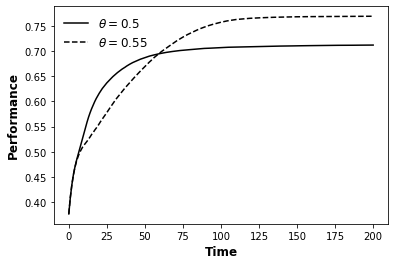

0.5 consensus 0.6719999999999999 0.55 consensus: 0.8913333333333331
0.7017733333333334 1.0075201779075778
0.7143352380952382 1.001373343954572
0.7153771428571427 1.0014585655394554
0.7658123174603172


<Figure size 432x288 with 0 Axes>

In [13]:
# View the iteration for threshold=0.5
# x = np.arange(0.40, 0.71, 0.01)
x = range(len(dao_original_performance[0][0: 201]))
# x = range(501)
fig, (ax1) = plt.subplots(1, 1)
ax1.plot(x, dao_original_performance[10][0: 201], "k-", label="$\\theta=0.5$")
ax1.plot(x, dao_original_performance[15][0: 201], "k--", label="$\\theta=0.55$")

# ax1.plot(x, dao_original_performance[20], "k:", label="$\\theta=0.60$")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
handles, labels = ax1.get_legend_handles_labels()
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Iterations_across_threshold.png", transparent=False, dpi=200)
plt.show()
plt.clf()
print("0.5 consensus", dao_consensus[10], "0.55 consensus:", dao_consensus[15])
print(dao_original_performance[10][75], dao_original_performance[10][100] / dao_original_performance[10][75])
print(dao_original_performance[10][501], dao_original_performance[10][501] / dao_original_performance[10][301])
print(dao_original_performance[10][-1], dao_original_performance[10][-1] / dao_original_performance[10][501])
print(hierarchy_reference[-1])

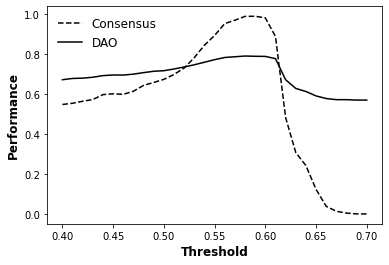

<Figure size 432x288 with 0 Axes>

In [14]:
# Performance
x = np.arange(0.40, 0.71, 0.01)
fig, (ax1) = plt.subplots(1, 1)
ax1.plot(x, dao_consensus, "k--", label="Consensus")
ax1.plot(x, dao_performance, "k-", label="DAO")
plt.xlabel('Threshold', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
handles, labels = ax1.get_legend_handles_labels()
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Performance_across_threshold.png", transparent=False, dpi=200)
plt.show()
plt.clf()

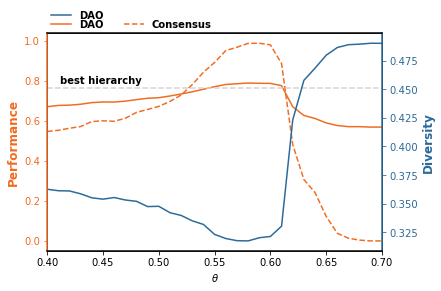

<Figure size 432x288 with 0 Axes>

In [35]:
# Twin
import numpy as np
x = np.arange(0.40, 0.71, 0.01)
legend_properties = {'weight':'bold'}

fig,ax1 = plt.subplots()
ax1.set_xlabel("$\\theta$", fontsize = 10)
ax1.set_ylabel("Performance", fontweight='bold', color="black", fontsize=12)

ax2=ax1.twinx()
ax2.set_ylabel("Diversity", fontweight='bold', color="black",fontsize=12)

ax2.spines["left"].set_linewidth(1.5)
ax2.spines["right"].set_linewidth(1.5)
ax2.spines["top"].set_linewidth(1.5)
ax2.spines["bottom"].set_linewidth(1.5)

ax2.spines['left'].set_color(nature_orange) # left y-axis
ax1.yaxis.label.set_color(nature_orange) # left y-axis labels
ax1.tick_params(axis='y', colors=nature_orange) # left y-axis params
ax2.spines['right'].set_color(nature_blue) # right y-axis
ax2.yaxis.label.set_color(nature_blue)  # right y-axis labels
ax2.tick_params(axis='y', colors=nature_blue) # right y-axis params
plt.xlim([0.4, 0.70])

line_1 = ax1.plot(x, dao_performance, "k-", color=nature_orange, label="DAO")
line_2 = ax1.plot(x, dao_consensus, "k--", color = nature_orange, label="Consensus")

line_3 = ax2.plot(x, dao_diversity, "k-", color= nature_blue, label="DAO")

line_4 = ax1.plot(x, [hierarchy_reference[-1]] * len(x), "k--", color=shallow_grey)
ax1.annotate('best hierarchy', xy=(60, 208), xycoords='figure points', weight="bold")

lines_1 = line_1 + line_2
labs_1 = [l.get_label() for l in lines_1]
ax1.legend(lines_1, labs_1, frameon=False, fontsize=10, loc=(0, 1),  ncol=3, prop=legend_properties)

lines_2 = line_3
labs_2 = [l.get_label() for l in lines_1]
ax2.legend(lines_2, labs_2, frameon=False, fontsize=10, loc=(0, 1.04),  ncol=3, prop=legend_properties)

plt.savefig(data_folder + r"\Threshold_performance_diversity_2.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()
plt.clf()


In [ ]:
# Test Variance
# View the iteration for threshold=0.5
# x = np.arange(0.40, 0.71, 0.01)
x = range(len(dao_original_performance[0]))
# x = range(501)
fig, (ax1) = plt.subplots(1, 1)

ax1.spines["left"].set_linewidth(1.5)
ax1.spines["right"].set_linewidth(1.5)
ax1.spines["top"].set_linewidth(1.5)
ax1.spines["bottom"].set_linewidth(1.5)

ax1.plot(x, dao_original_variance[0], "k-", label="$\\theta=0.40$", color=nature_blue)
ax1.plot(x, dao_original_variance[10], "k-", label="$\\theta=0.50$", color=nature_green)
ax1.plot(x, dao_original_variance[12], "k-", label="$\\theta=0.52$", color=nature_orange)
# ax1.plot(x, dao_original_variance[20], "k-", label="$\\theta=0.60$", color=nature_orange)
# ax1.plot(x, dao_original_variance[20], "y-", label="$\\theta=0.6$")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Variance', fontweight='bold', fontsize=12)
# plt.xticks(x)
handles, labels = ax1.get_legend_handles_labels()
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Variance_across_threshold_1.png", transparent=False, dpi=200)
plt.show()
plt.clf()
print(dao_original_variance[10][301], dao_original_variance[10][301] / dao_original_variance[10][201])
print(dao_original_variance[10][501], dao_original_variance[10][501] / dao_original_variance[10][301])
print(dao_original_variance[10][-1], dao_original_variance[10][-1] / dao_original_variance[10][501])

In [ ]:
# Test Variance
# View the iteration for threshold=0.5
# x = np.arange(0.40, 0.71, 0.01)
x = range(len(dao_original_performance[0]))
# x = range(501)
fig, (ax1) = plt.subplots(1, 1)

ax1.spines["left"].set_linewidth(1.5)
ax1.spines["right"].set_linewidth(1.5)
ax1.spines["top"].set_linewidth(1.5)
ax1.spines["bottom"].set_linewidth(1.5)

ax1.plot(x, dao_original_variance[0], "k-", label="$\\theta=0.40$", color=nature_blue)
ax1.plot(x, dao_original_variance[10], "k-", label="$\\theta=0.50$", color=nature_green)
ax1.plot(x, dao_original_variance[12], "k-", label="$\\theta=0.52$", color=nature_orange)
ax1.plot(x, dao_original_variance[20], "k-", label="$\\theta=0.60$", color=morandi_red)
# ax1.plot(x, dao_original_variance[20], "y-", label="$\\theta=0.6$")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Variance', fontweight='bold', fontsize=12)
# plt.xticks(x)
handles, labels = ax1.get_legend_handles_labels()
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Variance_across_threshold_2.png", transparent=False, dpi=200)
plt.show()
plt.clf()
print(dao_original_variance[10][301], dao_original_variance[10][301] / dao_original_variance[10][201])
print(dao_original_variance[10][501], dao_original_variance[10][501] / dao_original_variance[10][301])
print(dao_original_variance[10][-1], dao_original_variance[10][-1] / dao_original_variance[10][501])